In [258]:
# based on the scikit-image.data.binary_blobs

In [353]:
import numpy as np
from skimage.filters import gaussian
%pylab inline


def binary_blobs(shape=(5,5), sigma=1, n_dim=2,
                 volume_fraction=0.5, seed=None, points=None):
    """
    Generate synthetic binary image with several rounded blob-like objects.

    Parameters
    ----------
    length : int, optional
        Linear size of output image.
    blob_size_fraction : float, optional
        Typical linear size of blob, as a fraction of ``length``, should be
        smaller than 1.
    n_dim : int, optional
        Number of dimensions of output image.
    volume_fraction : float, default 0.5
        Fraction of image pixels covered by the blobs (where the output is 1).
        Should be in [0, 1].
    seed : int, optional
        Seed to initialize the random number generator.

    Returns
    -------
    blobs : ndarray of bools
        Output binary image

    Examples
    --------
    >>> from skimage import data
    >>> data.binary_blobs(length=5, blob_size_fraction=0.2, seed=1)
    array([[ True, False,  True,  True,  True],
           [ True,  True,  True, False,  True],
           [False,  True, False,  True,  True],
           [ True, False, False,  True,  True],
           [ True, False, False, False,  True]], dtype=bool)
    >>> blobs = data.binary_blobs(length=256, blob_size_fraction=0.1)
    >>> # Finer structures
    >>> blobs = data.binary_blobs(length=256, blob_size_fraction=0.05)
    >>> # Blobs cover a smaller volume fraction of the image
    >>> blobs = data.binary_blobs(length=256, volume_fraction=0.3)
    """
    rs = np.random.RandomState(seed)
    # shape = tuple([length] * n_dim)
    mask = np.zeros(shape)
    
    if points is None:
        # n_pts = max(int(1. / blob_size_fraction) ** n_dim, 1)
        n_pts = 10
        points = (shape[0] * rs.rand(n_dim, n_pts)).astype(np.int)
    else:
        n_pts = len(points)
    
    mask[[indices for indices in points]] = 1
    figure(); imshow(mask)
    mask = gaussian(mask, sigma=sigma)
    figure();imshow(mask)
    threshold = np.percentile(mask, 100 * (1 - volume_fraction))
    return np.logical_not(mask < threshold)

Populating the interactive namespace from numpy and matplotlib


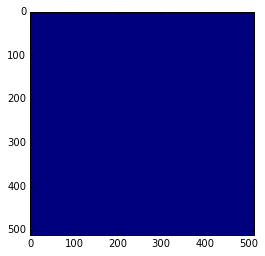

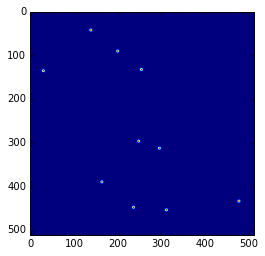

In [362]:
d = binary_blobs(shape=(512,512),sigma=2)

In [398]:
data = np.loadtxt('/home/ivan/shared/IIBR_2609_cptr4_PTV/Target_Files/blob0.176047_targets',skiprows=1)

In [406]:
points = np.c_[data[:,1],data[:,2]].astype(np.int)
points.T

array([[1141, 1770, 1812, 2062, 1277, 1508, 1814, 1485, 1930, 1469, 1400,
        1447, 1463, 1833, 1420, 1583, 1405,  589, 1519, 1195, 1518, 1010,
        1238, 1885, 1431, 1737, 1151, 1063,  751, 1401, 1314,  572, 1054,
        1578,  940, 1045, 1356,  897,  899, 1052,  786,  521,  972,  837,
         838, 1047, 1242,  838, 1274,  678,  974, 1284, 1187,  871,  658,
         655, 1088, 1468,  440,  470],
       [  24,   33,   48,   65,   83,   90,   89,  153,  153,  157,  161,
         163,  171,  186,  185,  224,  226,  256,  264,  273,  280,  304,
         319,  324,  326,  351,  350,  363,  371,  376,  390,  400,  403,
         417,  444,  449,  462,  485,  487,  494,  497,  500,  541,  555,
         556,  566,  570,  585,  590,  606,  613,  668,  682,  756,  815,
         830,  877,  895,  976, 1014]])

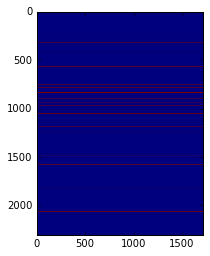

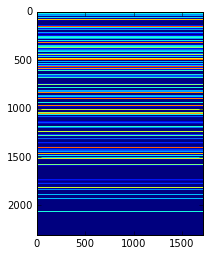

In [408]:
d = binary_blobs(shape=(2304,1720),points=points,sigma=3)

In [415]:
mask = np.zeros((1720,2304),dtype=np.uint8)

In [430]:
for p in points:
    mask[p[1],p[0]] = 1
    
mask = img_as_uint(gaussian(mask, sigma=3))

In [431]:
from skimage import img_as_uint

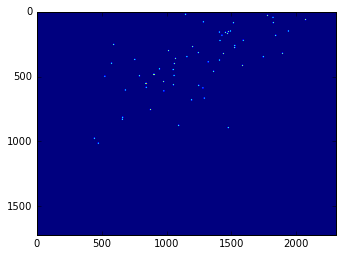

In [432]:
imshow(img_as_uint(mask))